In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
from sklearn.decomposition import PCA
from sklearn import ensemble, linear_model, svm
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
lfw = datasets.fetch_lfw_people(min_faces_per_person = 100, resize = 0.4)

In [3]:
lfw.keys(), lfw.data.shape 

(dict_keys(['data', 'images', 'target', 'target_names', 'DESCR']),
 (1140, 1850))

In [4]:
lfw_images =lfw.images

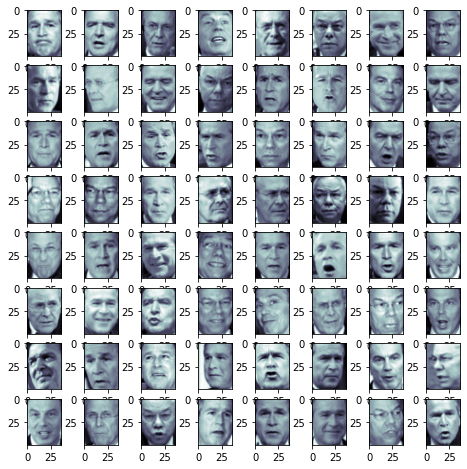

In [5]:
fig = plt.figure(figsize = (8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(lfw_images[i], cmap = plt.cm.bone)
    
plt.show()

In [6]:
X, y  = lfw.data, lfw.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Fitting the PCA without n_components on training data only

In [8]:
pca = PCA()
pca.fit_transform(X_train)  

array([[-1.4514601e+03, -3.2082985e+01, -3.9359976e+02, ...,
         3.5844919e-01, -6.3276041e-01,  1.7663700e-03],
       [-3.1963062e+02, -3.1955988e+02,  6.1115124e+01, ...,
         1.8069941e-01,  1.2348521e+00,  1.7664527e-03],
       [-1.2069272e+03, -7.9344177e+02, -3.3489902e+02, ...,
         4.9776578e-01,  2.4031684e-02,  1.7658746e-03],
       ...,
       [ 4.9566315e+02, -6.8017975e+02, -4.0407480e+02, ...,
        -1.0700357e+00, -9.6965618e-02,  1.7664827e-03],
       [-3.6750510e+02,  1.2416620e+03, -4.3800289e+01, ...,
        -1.1655575e+00,  1.6658616e+00,  1.7668358e-03],
       [ 1.9767574e+02,  6.0641646e+00, -2.1186563e+02, ...,
        -1.9752171e+00,  5.7710366e+00,  1.7661902e-03]], dtype=float32)

In [9]:
k = 0
total = sum(pca.explained_variance_)
current_variance = 0
while current_variance/total < 0.95:
    current_variance += pca.explained_variance_[k]
    k = k+1
    
k

130

# Applying PCA with n_components = k 

In [10]:
pca_lfw = PCA(n_components = k, whiten = True)
X_transformed = pca_lfw.fit_transform(X_train)
X_transformed.shape

(855, 130)

# Getting back the original data by inverse transform

In [11]:
X_approx = pca_lfw.inverse_transform(X_transformed)
X_approx_images = X_approx.reshape((855, 50, 37))

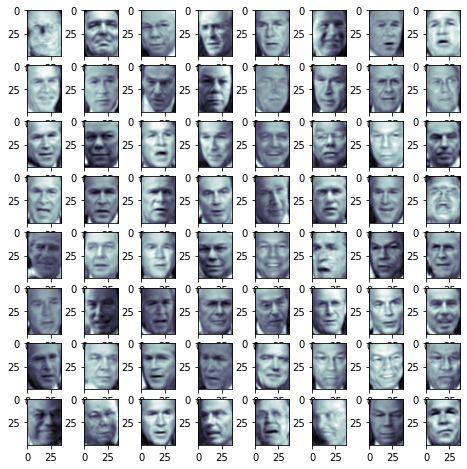

In [12]:
fig = plt.figure(figsize = (8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(X_approx_images[i], cmap = plt.cm.bone)
    
plt.show()

# Looking at the eigen vectors and eigen values

In [13]:
eigen_vec = pca_lfw.components_
eigen_vec.shape

(130, 1850)

In [14]:
#Reshaping these faces - These faces are representing the different aspects of the images and the faces.
eigen_faces = eigen_vec.reshape((130, 50, 37))

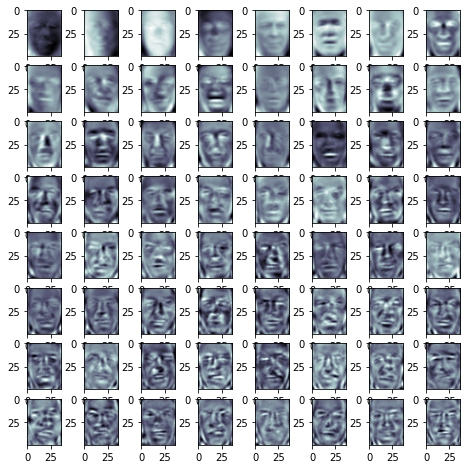

In [15]:
fig = plt.figure(figsize = (8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(eigen_faces[i], cmap = plt.cm.bone)
    
plt.show()

In [16]:
X_train_pca = X_transformed
X_test_pca = pca_lfw.transform(X_test) #only transform on testing data

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection

In [18]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [19]:
# evaluate each model in turn - Without Applying PCA
results = []
names = []
# prepare configuration for cross validation test harness
seed = 7
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver 

LR: 0.803571 (0.064840)
KNN: 0.516626 (0.117644)
CART: 0.449384 (0.058087)
NB: 0.508744 (0.104181)


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

SVM: 0.428079 (0.060375)


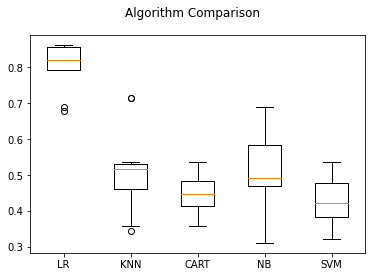

In [20]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [21]:
# evaluate each model in turn - After applying PCA
results = []
names = []
# prepare configuration for cross validation test harness
seed = 7
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_test_pca, y_test, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver 

LR: 0.779187 (0.063679)
KNN: 0.565025 (0.074785)
CART: 0.456034 (0.068551)
NB: 0.617241 (0.044953)


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

SVM: 0.575369 (0.068069)


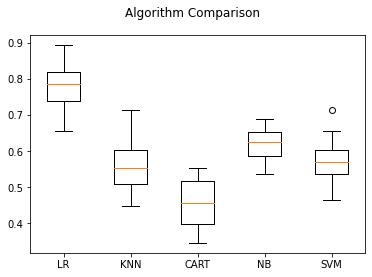

In [22]:
# boxplot algorithm comparison - After Applying PCA
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()